In [1]:
import sys
sys.path.append('../')
import matplotlib.pyplot as plt
import numpy as np
import os
import seaborn as sns
import math
from utils import *
import argparse
from matplotlib.legend_handler import HandlerLine2D

In [20]:
img_list = ['../result/GPT_近义词学习_验证加入近义词与单纯扩张数据量的效果对比/对比近义词学习和扩种数据量效果.png', 
            '../result/GPT_近义词学习_验证加入近义词与单纯扩张数据量的效果对比/两类泛化误差.png']
display_fig(img_list, width=[470, 176])

In [3]:
def compare_three_model(datasize_list=[1000, 2000, 3000, 4000, 6000, 8000, 10000, 20000]):

    fig = plt.figure(figsize=(12, 6))
    format_settings(left=0.15, bottom=0.15, top=0.8, major_tick_len=0, fs=16)
    plt.rcParams['xtick.major.pad'] = 10
    plt.rcParams['ytick.major.pad'] = 5

    plt.rcParams['axes.spines.top'] = False
    plt.rcParams['axes.spines.right'] = False
    plt.rcParams['axes.spines.left'] = False

    ax = plt.gca()

    working_dir = f'../result/GPT_近义词学习_验证加入近义词与单纯扩张数据量的效果对比'

    labels = ['acc1_34', 'acc1_43', 'acc1_94', 'acc1_49', 'acc2_94', 'acc2_49']

    # 画横线
    for y in [0.2, 0.4, 0.6, 0.8, 1]:
        ax.axhline(y=y, color='lightgrey', linestyle='-', linewidth=1, zorder=1)

    acc1_94_list, acc1_49_list = [], []
    acc2_94_list, acc2_49_list = [], []
    acc3_94_list, acc3_49_list = [], []

    for i, datasize in enumerate(datasize_list):
        test_acc_his1 = np.load(f'{working_dir}/near_synonym-seed_1-N_{datasize}-add_prompt3_data/loss/test_acc_his.npy')
        test_acc_his2 = np.load(f'{working_dir}/near_synonym-seed_1-N_{datasize}-increase_prompt9_data/loss/test_acc_his.npy')
        test_acc_his3 = np.load(f'{working_dir}/near_synonym-seed_1-N_{datasize}-add_11224499_data/loss/test_acc_his.npy')

        args = read_json_data(f'{working_dir}/near_synonym-seed_1-N_{datasize}-add_prompt3_data/config.json')
        args = argparse.Namespace(**args)

        # acc1_34 = test_acc_his1[:, args.data_name.index('34')][-1]
        # acc1_43 = test_acc_his1[:, args.data_name.index('43')][-1]
        acc1_94 = test_acc_his1[:, args.data_name.index('94')][-1]
        acc1_49 = test_acc_his1[:, args.data_name.index('49')][-1]

        acc2_94 = test_acc_his2[:, args.data_name.index('94')][-1]
        acc2_49 = test_acc_his2[:, args.data_name.index('49')][-1]

        acc3_94 = test_acc_his3[:, args.data_name.index('94')][-1]
        acc3_49 = test_acc_his3[:, args.data_name.index('49')][-1]

        # acc1_34_list.append(acc1_34)
        # acc1_43_list.append(acc1_43)
        acc1_94_list.append(acc1_94)
        acc1_49_list.append(acc1_49)
        acc2_94_list.append(acc2_94)
        acc2_49_list.append(acc2_49)
        acc3_94_list.append(acc3_94)
        acc3_49_list.append(acc3_49)
    
    mw = 1.5

    labels = ['pattern A  94', 'pattern A  49', 'pattern B  94', 'pattern B  49', 'pattern C  94', 'pattern C  49']
    ax.plot(np.arange(len(datasize_list)), acc1_94_list, label=labels[0], lw=3, ls='-',  color='#C82423', marker='d', markersize=13, markeredgewidth=mw, markeredgecolor='black', zorder=6)
    ax.plot(np.arange(len(datasize_list)), acc1_49_list, label=labels[1], lw=3, ls='--', color='#C82423', marker='d', markersize=13, markeredgewidth=mw, markeredgecolor='black', zorder=6)
    ax.plot(np.arange(len(datasize_list)), acc2_94_list, label=labels[2], lw=3, ls='-',  color='#2878B5', marker='X', markersize=13, markeredgewidth=mw, markeredgecolor='black', zorder=4)
    ax.plot(np.arange(len(datasize_list)), acc2_49_list, label=labels[3], lw=3, ls='--', color='#2878B5', marker='X', markersize=13, markeredgewidth=mw, markeredgecolor='black', zorder=4)
    ax.plot(np.arange(len(datasize_list)), acc3_94_list, label=labels[4], lw=3, ls='-',  color='seagreen', marker='h', markersize=13, markeredgewidth=mw, markeredgecolor='black', zorder=5)
    ax.plot(np.arange(len(datasize_list)), acc3_49_list, label=labels[5], lw=3, ls='--', color='seagreen', marker='h', markersize=13, markeredgewidth=mw, markeredgecolor='black', zorder=5)

        
    ax.set_xticks(np.arange(len(datasize_list)))
    ax.set_xticklabels(datasize_list)
    ax.set_yticks([0, 0.2, 0.4, 0.6, 0.8, 1.0])
    ax.set_yticklabels(['0%', '20%', '40%', '60%', '80%', '100%'])

    ax.set_xlabel('Data size', labelpad=10)
    ax.set_ylabel('Accuracy')

    ax.legend(loc=(0, 1.02), frameon=False, ncol=3, handlelength=4)

    plt.savefig(f'{working_dir}/对比近义词学习_扩种数据量_加入叠词效果.png', dpi=300)
    print(f'saved at {working_dir}/对比近义词学习_扩种数据量_加入叠词效果.png')


def compare_two_model(datasize_list=[1000, 2000, 3000, 4000, 6000, 8000, 10000, 20000]):

    fig = plt.figure(figsize=(12, 6))
    format_settings(left=0.15, right=0.95, bottom=0.15, top=0.8, major_tick_len=0, fs=24)
    plt.rcParams['xtick.major.pad'] = 10
    plt.rcParams['ytick.major.pad'] = 5

    plt.rcParams['axes.spines.top'] = False
    plt.rcParams['axes.spines.right'] = False
    plt.rcParams['axes.spines.left'] = False

    ax = plt.gca()

    working_dir = f'../result/GPT_近义词学习_验证加入近义词与单纯扩张数据量的效果对比'

    # 画横线
    for y in [0.2, 0.4, 0.6, 0.8, 1]:
        ax.axhline(y=y, color='lightgrey', linestyle='-', linewidth=1, zorder=1)

    acc1_94_list, acc1_49_list = [], []
    acc2_94_list, acc2_49_list = [], []

    for i, datasize in enumerate(datasize_list):
        test_acc_his1 = np.load(f'{working_dir}/near_synonym-seed_1-N_{datasize}-add_prompt3_data/loss/test_acc_his.npy')
        test_acc_his2 = np.load(f'{working_dir}/near_synonym-seed_1-N_{datasize}-increase_prompt9_data/loss/test_acc_his.npy')
      
        args = read_json_data(f'{working_dir}/near_synonym-seed_1-N_{datasize}-add_prompt3_data/config.json')
        args = argparse.Namespace(**args)

        acc1_94 = test_acc_his1[:, args.data_name.index('94')][-1]
        acc1_49 = test_acc_his1[:, args.data_name.index('49')][-1]

        acc2_94 = test_acc_his2[:, args.data_name.index('94')][-1]
        acc2_49 = test_acc_his2[:, args.data_name.index('49')][-1]


        acc1_94_list.append(acc1_94)
        acc1_49_list.append(acc1_49)
        acc2_94_list.append(acc2_94)
        acc2_49_list.append(acc2_49)
    
    mw = 1.5

    labels = ['94 (Synonym learning)', '49 (Synonym learning)', '94 (More sampling)', '49 (More sampling)']
    ax.plot(np.arange(len(datasize_list)), acc1_94_list, label=labels[0], lw=3, ls='-',  color='#C82423', marker='d', markersize=13, markeredgewidth=mw, markeredgecolor='black', zorder=6)
    ax.plot(np.arange(len(datasize_list)), acc1_49_list, label=labels[1], lw=3, ls='--', color='#C82423', marker='d', markersize=13, markeredgewidth=mw, markeredgecolor='black', zorder=6)
    ax.plot(np.arange(len(datasize_list)), acc2_94_list, label=labels[2], lw=3, ls='-',  color='#2878B5', marker='X', markersize=13, markeredgewidth=mw, markeredgecolor='black', zorder=4)
    ax.plot(np.arange(len(datasize_list)), acc2_49_list, label=labels[3], lw=3, ls='--', color='#2878B5', marker='X', markersize=13, markeredgewidth=mw, markeredgecolor='black', zorder=4)
        
    ax.set_xticks(np.arange(len(datasize_list)))
    ax.set_xticklabels(datasize_list)
    ax.set_yticks([0, 0.2, 0.4, 0.6, 0.8, 1.0])
    ax.set_yticklabels(['0%', '20%', '40%', '60%', '80%', '100%'])

    # ax.set_yticks([0.2, 0.6, 1.0])
    # ax.set_yticklabels(['20%', '60%', '100%'])

    ax.set_xlabel('Data size', labelpad=10)
    ax.set_ylabel('Accuracy')

    ax.legend(loc=(-0.12, 1.02), frameon=False, ncol=2, handlelength=3, columnspacing=1.5)

    plt.savefig(f'{working_dir}/对比近义词学习和扩种数据量效果.png', dpi=300)
    print(f'saved at {working_dir}/对比近义词学习和扩种数据量效果.png')


def compare_one_model(datasize_list=[1000, 2000, 3000, 4000, 6000, 8000, 10000, 20000]):

    fig = plt.figure(figsize=(12, 6))
    format_settings(left=0.15, bottom=0.15, top=0.8, major_tick_len=0, fs=16)
    plt.rcParams['xtick.major.pad'] = 10
    plt.rcParams['ytick.major.pad'] = 5

    plt.rcParams['axes.spines.top'] = False
    plt.rcParams['axes.spines.right'] = False
    plt.rcParams['axes.spines.left'] = False

    ax = plt.gca()

    working_dir = f'../result/GPT_近义词学习_验证加入近义词与单纯扩张数据量的效果对比'

    # 画横线
    for y in [0.2, 0.4, 0.6, 0.8, 1]:
        ax.axhline(y=y, color='lightgrey', linestyle='-', linewidth=1, zorder=1)

    acc1_94_list, acc1_49_list = [], []

    for i, datasize in enumerate(datasize_list):
        test_acc_his1 = np.load(f'{working_dir}/near_synonym-seed_1-N_{datasize}-add_prompt3_data/loss/test_acc_his.npy')
        args = read_json_data(f'{working_dir}/near_synonym-seed_1-N_{datasize}-add_prompt3_data/config.json')
        args = argparse.Namespace(**args)

        acc1_94 = test_acc_his1[:, args.data_name.index('94')][-1]
        acc1_49 = test_acc_his1[:, args.data_name.index('49')][-1]


        acc1_94_list.append(acc1_94)
        acc1_49_list.append(acc1_49)
    
    mw = 1.5

    labels = ['94', '49']
    ax.plot(np.arange(len(datasize_list)), acc1_94_list, label=labels[0], lw=3, ls='-',  color='#C82423', marker='d', markersize=13, markeredgewidth=mw, markeredgecolor='black', zorder=6)
    ax.plot(np.arange(len(datasize_list)), acc1_49_list, label=labels[1], lw=3, ls='--', color='#C82423', marker='d', markersize=13, markeredgewidth=mw, markeredgecolor='black', zorder=6)

        
    ax.set_xticks(np.arange(len(datasize_list)))
    ax.set_xticklabels(datasize_list)
    ax.set_yticks([0, 0.2, 0.4, 0.6, 0.8, 1.0])
    ax.set_yticklabels(['0%', '20%', '40%', '60%', '80%', '100%'])

    ax.set_xlabel('Data size', labelpad=10)
    ax.set_ylabel('Accuracy')

    ax.legend(loc=(0, 1.02), frameon=False, ncol=3, handlelength=4, columnspacing=5)

    plt.savefig(f'{working_dir}/近义词学习.png', dpi=300)
    print(f'saved at {working_dir}/近义词学习.png')



考虑复合运算，原始数据中的二元prompt取自：['19', '29', '91', '92', '12', '14', '21', '41', '24', '42']，包含这些prompt的句子数量相同，设总数据量为N。因为没有见过promt 9与prompt 4共同作用的数据，因此transformer很难学到'49','94'这样的复合函数。

下图考虑了三种增强数据的方式，以观察哪类增强方式更有助于模型学到复合函数'49','94'。我们总是控制3类方法扩充所得数据的总数据量相同：

(a) 往数据中加入包含prompt '3'的数据。各类复合prompt数据量的比例为n(19):n(29):n(91):n(92):n(13):n(23):n(43):n(31):n(32):n(34):n(12):n(14):n(21):n(41):n(24):n(42)=1:1:1:1:m:m:m:m:m:m:m+1:m+1:m+1:m+1:m+1:m+1。

(b) 往数据集中加入包含promt '11','22','44','99'的数据。各类复合prompt数据量的比例为n(19):n(29):n(91):n(92):n(12):n(14):n(21):n(41):n(24):n(42):n(11):n(22):n(44):n(99)=1:1:1:1:1:1:1:1:1:1:1:1:1:1。

(c) 扩张已有的prompt。各类复合prompt数据量的比例为n(19):n(29):n(91):n(92):n(13):n(23):n(43):n(31):n(32):n(34):n(12):n(14):n(21):n(41):n(24):n(42)=1:1:1:1:1:1:1:1:1:1:1:1。

saved at ../result/GPT_近义词学习_验证加入近义词与单纯扩张数据量的效果对比/近义词学习.png


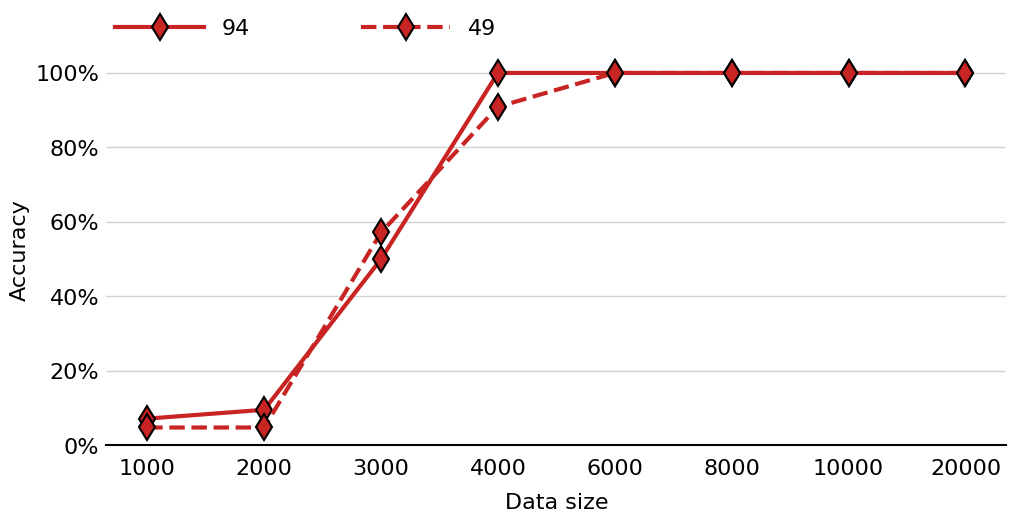

In [4]:
compare_one_model()

saved at ../result/GPT_近义词学习_验证加入近义词与单纯扩张数据量的效果对比/对比近义词学习和扩种数据量效果.png


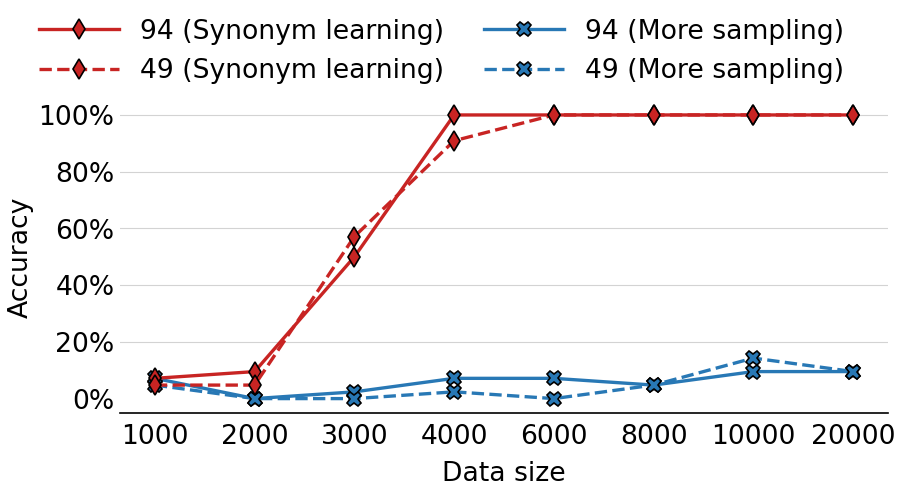

In [5]:
compare_two_model()

saved at ../result/GPT_近义词学习_验证加入近义词与单纯扩张数据量的效果对比/对比近义词学习_扩种数据量_加入叠词效果.png


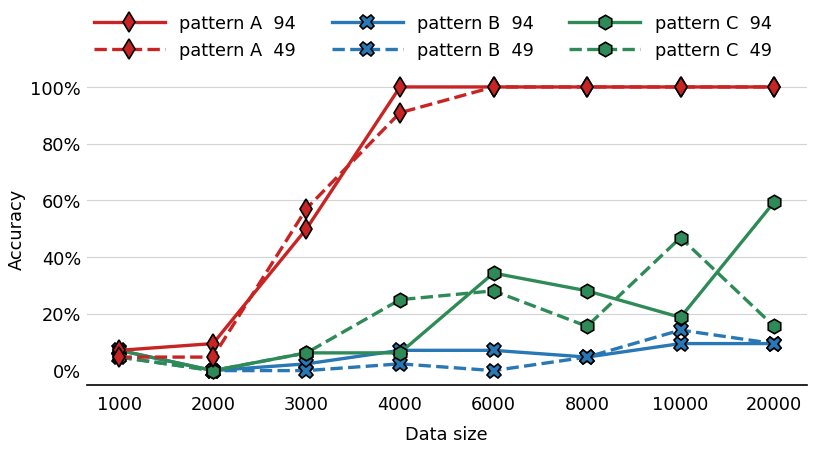

In [6]:
compare_three_model()

In [7]:
def plot_acc_of_mask_unmask_with_datasize_together(exp_dir, datasize_list, seed_list, target='near_synonym', plot_data_show = False):
    r'''
        绘制最终实验结果和数据量的关系
        每个datasize画一个多图
        多图中，每个子图画acc
    '''

    color_list = ['m', 'teal', 'magenta', 'c']

    for i, s in enumerate(seed_list):

        fig = plt.figure(figsize=(12, 3))
        format_settings(wspace=0.25, hspace=0.1, bottom=0.2, left=0.08, right=0.97, top=0.81, lw=1, ms=2, fs=10)
        plt.rcParams['axes.spines.top'] = False
        plt.rcParams['axes.spines.right'] = False
        grid = plt.GridSpec(1, len(datasize_list))

        for j, N in enumerate(datasize_list):
            # working_dir = f'{exp_dir}/{target}-seed_{s}-N_{N}'
            working_dir = f'{exp_dir}/{target}-seed_{s}-N_{N}-add_prompt3_data'

            args = read_json_data(f'{working_dir}/config.json')
            args = argparse.Namespace(**args)

            train_acc_his = np.load(f'{working_dir}/loss/train_acc_his.npy')
            test_acc_his = np.load(f'{working_dir}/loss/test_acc_his.npy')

            acc_epoch_his = np.load(f'{working_dir}/loss/acc_epoch_his.npy')

            plot_mask = 0
            if os.path.exists(f'{working_dir}/loss/acc_train_mask_his.npy'):
                acc_train_mask_his = np.load(f'{working_dir}/loss/acc_train_mask_his.npy')
                acc_test_mask_his = np.load(f'{working_dir}/loss/acc_test_mask_his.npy')
                plot_mask = 1
            acc_train_unmask_his = np.load(f'{working_dir}/loss/acc_train_unmask_his.npy')
            acc_test_unmask_his = np.load(f'{working_dir}/loss/acc_test_unmask_his.npy')

            # 将acc_epoch_his每间隔3个取一个
            acc_epoch_his = acc_epoch_his[::3]
            acc_train_unmask_his = acc_train_unmask_his[::3]
            acc_test_unmask_his = acc_test_unmask_his[::3]
            if plot_mask:
                acc_train_mask_his = acc_train_mask_his[::3]
                acc_test_mask_his = acc_test_mask_his[::3]


            
            ax = fig.add_subplot(grid[0, j])

            if j == 0:
                handler_map = {}
            color_list = ['tomato', 'steelblue', 'lightsalmon', 'skyblue']
            l1, = ax.plot(acc_epoch_his, acc_train_unmask_his, label=f'seen prompt seen content', lw=2, color=color_list[0], 
                    marker = 'o', markersize=5, markeredgewidth=1, markeredgecolor='black', zorder=6)
            l2, = ax.plot(acc_epoch_his, acc_test_unmask_his, label=f'seen prompt unseen content', color=color_list[1], 
                    marker = 'o', markersize=6, markeredgewidth=1, markeredgecolor='black', zorder=5)
            
            if j == 0:
                handler_map[l1] = HandlerLine2D(numpoints=2)
                handler_map[l2] = HandlerLine2D(numpoints=2)
                handles = [l1, l2]

            # # 如果存在mask的数据，则绘制mask数据的acc
            # if plot_mask:
            #     l3, = ax.plot(acc_epoch_his, acc_train_mask_his, label=f'unseen prompt seen content', lw=2, color=color_list[2], 
            #             marker = '^', markersize=5, markeredgewidth=1, markeredgecolor='black', zorder=6)        
            #     l4, = ax.plot(acc_epoch_his, acc_test_mask_his, label=f'unseen prompt unseen content', color=color_list[3], 
            #             marker = '^', markersize=6, markeredgewidth=1, markeredgecolor='black', zorder=5)
                
            #     if j == 0:
            #         handler_map[l3] = HandlerLine2D(numpoints=2)
            #         handler_map[l4] = HandlerLine2D(numpoints=2)
            #         handles.extend([l3, l4])

            if plot_data_show:
                # 首先从一个色系中挑选颜色
                data_show_index = np.nonzero(args.data_show)[0]
                data_color_list = get_color_list(n_colors=len(data_show_index), cmap='viridis', color_min=0, color_max=1)
          
                for k, index in enumerate(data_show_index):
                    if args.data_mask[index] == 0:
                        marker = 'p'
                    else:
                        marker = 'd'
                    l6, = ax.plot(acc_epoch_his, test_acc_his[:, index][::3], label=f'test {args.data_name[index]}', color=data_color_list[k], alpha=0.75, \
                            marker = marker, markersize=6, markeredgewidth=1, markeredgecolor='black', zorder=5)
                    
                    if j == 0:
                        handler_map[l6] = HandlerLine2D(numpoints=2)
                        handles.append(l6)
            

            if j == 0:
                ax.set_yticks([0, 0.2, 0.4, 0.6, 0.8, 1.0])
                ax.set_yticklabels(['0%', '20%', '40%', '60%', '80%', '100%'])
            else:
                ax.set_yticks([0, 0.2, 0.4, 0.6, 0.8, 1.0])
                ax.set_yticklabels(['', '', '', '', '', ''])

            ax.set_xlabel('Epoch', fontsize=12)

            if j == 0:
                ax.set_ylabel('Accuracy', fontsize=12)

            ax.set_ylim(-0.1, 1.1)

            # legend
            if j == 0:
                # ax.legend(loc=(0, 1.15), handles=handles, ncol=3, columnspacing=4, 
                #           frameon=False, handler_map=handler_map, fontsize=10, handlelength=3)
                ax.legend(loc=(0, 1.15), handles=handles, ncol=6, 
                          frameon=False, handler_map=handler_map, fontsize=10, handlelength=3)

            # title
            ax.set_title(f'data size = {N}', fontsize=12)

        plt.savefig(f'{exp_dir}/两类泛化误差.png', dpi=300)
        print(f'saved at {exp_dir}/两类泛化误差.png')

saved at ../result/GPT_近义词学习_验证加入近义词与单纯扩张数据量的效果对比/两类泛化误差.png


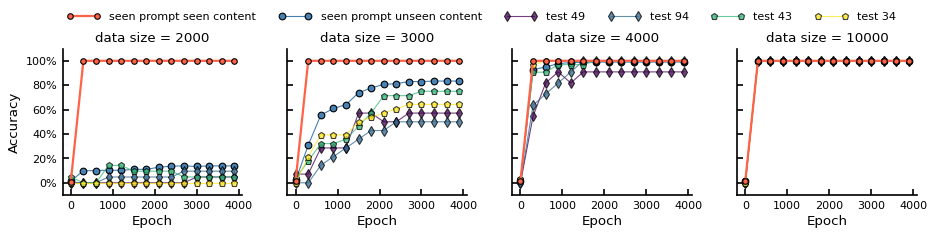

In [8]:
plot_acc_of_mask_unmask_with_datasize_together(exp_dir='../result/GPT_近义词学习_验证加入近义词与单纯扩张数据量的效果对比', 
                                                datasize_list=[2000, 3000, 4000, 10000], seed_list=[1], plot_data_show=True)

In [11]:
def plot_acc_of_mask_unmask_with_datasize_together(exp_dir, datasize_list, seed_list, target='near_synonym', plot_data_show = False):
    r'''
        绘制最终实验结果和数据量的关系
        每个datasize画一个多图
        多图中，每个子图画acc
    '''

    for i, s in enumerate(seed_list):

        fig = plt.figure(figsize=(6, 8))
        format_settings(wspace=0.8, hspace=0.6, bottom=0.1, left=0.25, right=0.92, top=0.95, lw=3, ms=3, fs=24)
        plt.rcParams['axes.spines.top'] = False
        plt.rcParams['axes.spines.right'] = False
        grid = plt.GridSpec(len(datasize_list), 1)

        for j, N in enumerate(datasize_list):
            # working_dir = f'{exp_dir}/{target}-seed_{s}-N_{N}'
            working_dir = f'{exp_dir}/{target}-seed_{s}-N_{N}-add_prompt3_data'

            args = read_json_data(f'{working_dir}/config.json')
            args = argparse.Namespace(**args)

            train_acc_his = np.load(f'{working_dir}/loss/train_acc_his.npy')
            test_acc_his = np.load(f'{working_dir}/loss/test_acc_his.npy')

            acc_epoch_his = np.load(f'{working_dir}/loss/acc_epoch_his.npy')

            plot_mask = 0
            if os.path.exists(f'{working_dir}/loss/acc_train_mask_his.npy'):
                acc_train_mask_his = np.load(f'{working_dir}/loss/acc_train_mask_his.npy')
                acc_test_mask_his = np.load(f'{working_dir}/loss/acc_test_mask_his.npy')
                plot_mask = 1
            acc_train_unmask_his = np.load(f'{working_dir}/loss/acc_train_unmask_his.npy')
            acc_test_unmask_his = np.load(f'{working_dir}/loss/acc_test_unmask_his.npy')

            # 将acc_epoch_his每间隔3个取一个
            acc_epoch_his = acc_epoch_his[::3]
            acc_train_unmask_his = acc_train_unmask_his[::3]
            acc_test_unmask_his = acc_test_unmask_his[::3]
            if plot_mask:
                acc_train_mask_his = acc_train_mask_his[::3]
                acc_test_mask_his = acc_test_mask_his[::3]


            
            ax = fig.add_subplot(grid[j, 0])

            if j == 0:
                handler_map = {}
            color_list = ['tomato', 'steelblue', 'lightsalmon', 'skyblue']
            # l1, = ax.plot(acc_epoch_his, acc_train_unmask_his, label=f'seen prompt seen content', lw=2, color=color_list[0], 
            #         marker = 'o', markersize=5, markeredgewidth=1, markeredgecolor='black', zorder=6)
            # l2, = ax.plot(acc_epoch_his, acc_test_unmask_his, label=f'seen prompt unseen content', color=color_list[1], 
            #         marker = 'o', markersize=6, markeredgewidth=1, markeredgecolor='black', zorder=5)
            
            # if j == 0:
            #     handler_map[l1] = HandlerLine2D(numpoints=2)
            #     handler_map[l2] = HandlerLine2D(numpoints=2)
            #     handles = [l1, l2]

            handles = []
            if plot_data_show:
                # 首先从一个色系中挑选颜色
                data_show_index = np.nonzero(args.data_show)[0]
                data_color_list = get_color_list(n_colors=len(data_show_index), cmap='viridis', color_min=0, color_max=1)
          
                for k, index in enumerate(data_show_index):
                    if args.data_mask[index] == 0:
                        marker = 'p'
                    else:
                        marker = 'd'
                    l6, = ax.plot(acc_epoch_his, test_acc_his[:, index][::3], label=f'test {args.data_name[index]}', color=data_color_list[k], \
                            marker = marker, markersize=12, markeredgewidth=1, markeredgecolor='black', zorder=5)
                    
                    if j == 1:
                        handler_map[l6] = HandlerLine2D(numpoints=2)
                        handles.append(l6)
            
            ax.set_xticks([0, 2000, 4000])
            ax.set_xticklabels([0, 2000, 4000])

            ax.set_yticks([0.2, 0.6, 1.0])
            ax.set_yticklabels(['20%', '60%', '100%'])

            ax.set_xlabel('Epoch')
            ax.set_ylabel('Accuracy')

            ax.set_ylim(-0.1, 1.1)

            # legend
            # if j == 0:
            #     ax.legend(loc=(0, 1.15), handles=handles, ncol=6, 
            #               frameon=False, handler_map=handler_map, fontsize=24, handlelength=3)
            
            if j == 1:
                ax.legend(loc=(0.35, 0.05), handles=handles, ncol=1, 
                          frameon=False, handler_map=handler_map, fontsize=20, handlelength=2)

            # title
            ax.set_title(f'data size = {N}')

        plt.savefig(f'{exp_dir}/两类泛化误差.png', dpi=300)
        print(f'saved at {exp_dir}/两类泛化误差.png')

saved at ../result/GPT_近义词学习_验证加入近义词与单纯扩张数据量的效果对比/两类泛化误差.png


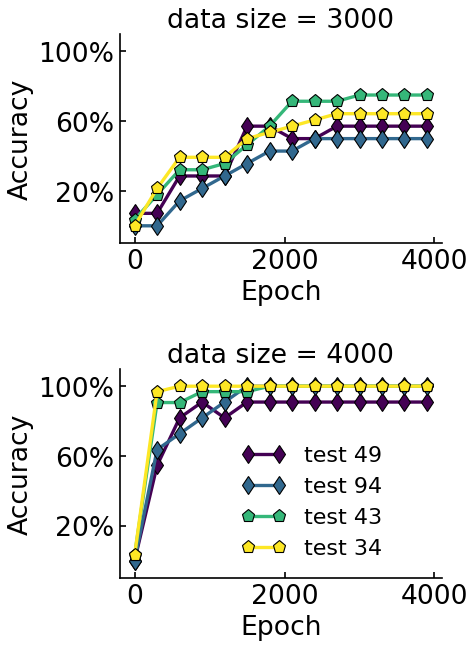

In [12]:
plot_acc_of_mask_unmask_with_datasize_together(exp_dir='../result/GPT_近义词学习_验证加入近义词与单纯扩张数据量的效果对比', 
                                                datasize_list=[3000, 4000], seed_list=[1], plot_data_show=True)